In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df1 = pd.read_csv("records_final_series_ODI_bowlers_v1.csv")

In [35]:
df1.head()

,Player,Country,Mat,Overs,Maidens,Runs,Wickets,4w,Best,Avg,S/R,E/R,Series_Code,H/A,Decade_Index,Matches
0,McKenzie G D,Australia,1,7.4,0,22,2,0,22-Feb,11.00,30.00,2.20,193,Home,0,1
1,Mallett A A,Australia,1,8.0,1,34,3,0,Mar-34,11.33,21.33,3.19,193,Home,0,1
2,Stackpole K R,Australia,1,8.0,0,40,3,0,Mar-40,13.33,21.33,3.75,193,Home,0,1
3,Illingworth R,England,1,8.0,1,50,3,0,Mar-50,16.67,21.33,4.69,193,Away,0,1
4,Thomson A L,Australia,1,8.0,2,22,1,0,22-Jan,22.00,64.00,2.06,193,Home,0,1


In [4]:
#df1.sort_values(['Series_Code', 'Mat'], ascending=[True, False], inplace=True)

In [5]:
#df1

In [36]:
series = df1['Decade_Index'].values
number, series_unique = np.unique(series, return_inverse = True)

In [41]:
players = df1['Player'].values
player_names, player_indices = np.unique(players, return_index = True)
player_dict_temp_3 = {}
for i in df1.index:
    if df1["Player"][i] in player_dict_temp_3.keys():
        player_dict_temp_3[df1["Player"][i]] = player_dict_temp_3[df1["Player"][i]] + [i]
    else:
        player_dict_temp_3[df1["Player"][i]] = [i]

In [8]:
player_indices

array([  277,  3170,  1953, ...,  7363, 10371,  8658], dtype=int64)

In [42]:
series_codes = df1['Series_Code'].values
series_list, series_occurances, series_code = np.unique(series_codes, return_index=True, return_inverse = True)
#series_list

In [43]:
series_to_number = {'Australia':0, 'Pakistan':1, 'New Zealand':2, 'West Indies':3, 'England':4, 'India' :5, 'Sri Lanka':6, 'Bangladesh':7, 'Zimbabwe':8, 'South Africa':9, 'Other':10} 
#opposition_country =[]
series_country = []
j = 0
for i in series_occurances:
    home = 0
    away = 0
    j = i
    s_code = df1['Series_Code'][i]
    while 1 != 0:
        #print(j)
        if df1['H/A'][j] == 'Home' and home == 0:
            #print(df['Country'][j])
            country = df1['Country'][j]
            home = home + 1
        if df1['Series_Code'][j]!=s_code or home ==1:
            break    
        j = j + 1 
    if country in series_to_number.keys():
        series_country.append(series_to_number[country])
    else:
        series_country.append(10)

In [11]:
#series_country

In [12]:
#len(series_country)

In [44]:
series_list = list(series_list)

In [45]:
trps = np.zeros(656)

for i in df1.index:
    avg = df1["Avg"][i]
    if not np.isnan(avg):
        s = df1["Series_Code"][i]
        index = np.where(series_list == s)[0]
        #print(index)
        trps[index] += df1["Runs"][i]

In [15]:
trps


array([  1687.,   1136.,   1090.,    235.,   1089.,    216.,    462.,
          642.,    763.,    832.,    470.,    246.,    302.,   5106.,
          303.,    595.,    988.,    350.,    246.,    942.,    812.,
          577.,    546.,    614.,    682.,    781.,   4144.,    253.,
         4780.,    743.,    637.,    689.,   6353.,    433.,    648.,
         1008.,   6293.,    871.,    818.,    604.,    904.,    526.,
          836.,   1300.,    599.,   1336.,   6087.,   1077.,    212.,
          967.,   1155.,    900.,  10677.,    532.,   1570.,    711.,
         6206.,   1227.,    884.,    453.,    727.,   1103.,   1273.,
          479.,    440.,   1259.,   1933.,   1429.,   7325.,   3864.,
         1521.,    982.,   1342.,    968.,   1368.,    734.,   1688.,
         5976.,   1246.,    580.,   1510.,    673.,    833.,   1306.,
          680.,    793.,   2365.,   1544.,   1835.,   1691.,   2680.,
         5133.,   2234.,   1060.,   2094.,    986.,  11543.,    989.,
         2601.,   50

In [46]:
arpspc = np.zeros(11)
tmpc = np.zeros(11)
for i in range(len(trps)):
    tmpc[series_country[i]] += df1['Matches'][series_occurances[i]]
    arpspc[series_country[i]] += trps[i]

In [47]:
arpc=arpspc/tmpc

In [48]:
avr_average = np.average(arpc)

In [49]:
weights_arpc = np.average(arpc)/arpc

In [50]:
weights_arpc

array([ 0.94370681,  0.98110777,  1.00771905,  0.99912575,  0.99241729,
        0.93649992,  1.05536995,  1.0256387 ,  1.02115162,  0.96084184,
        1.09907793])

In [51]:
weighted_runs_arr = []
for i in df1.index:
    #print(series_code[i])
    w = weights_arpc[series_country[series_code[i]]]
    weighted_runs_arr.append(df1['Runs'][i]*w)
#weighted_runs_arr

In [52]:
wtrps = np.zeros(656)
twps = np.zeros(656)
tops = np.zeros(656)
tbps = np.zeros(656)
balls = np.zeros(len(df1.index))
for i in df1.index:
    avg = df1["Avg"][i]
    if not np.isnan(avg):
        wtrps[series_code[i]] += weighted_runs_arr[i]
        twps[series_code[i]] += df1["Wickets"][i]
        balls[i] = math.floor(df1["Overs"][i])*6 + (df1["Overs"][i]- math.floor(df1["Overs"][i]))*10
        tbps[series_code[i]] += balls[i]
        
    tops[series_code[i]] += df1["Overs"][i]

In [53]:
def bowl_calc(param):
    bowl1=np.zeros(len(df1.index))
    for i in df1.index:
        bowl1[i] = (wtrps[series_code[i]] - weighted_runs_arr[i])/(tops[series_code[i]]-df1["Overs"][i])
        e_r = df1[param][i]
        bowl1[i] = bowl1[i]/e_r
        if np.isnan(e_r) or  e_r == 0:
            bowl1[i] = 0
    return bowl1

In [54]:
def name(bowl, x):
    runs_metric = []
    player_dict_temp = {}


    for i in player_names:
        no_of_wickets=0
        spf_sum = 0
        no_series = 0
        no_balls = 0
        for j in player_dict_temp_3[i]:
            spf_sum += bowl[j]
            no_series += 1
            no_of_wickets += df1["Wickets"][j]
            #no_balls += balls[j]
        #if(no_balls > 4000):
        if(no_of_wickets > x):    
            #runs_metric_20.append(runs/no_of_matches)
            player_dict_temp[i] = spf_sum/no_series

    sum_values =sum(player_dict_temp.values())
    '''for k,v in s:
        sum_values += v
        #print(k,":",v)'''
    a = sum_values/len(player_dict_temp) 
    return player_dict_temp, a

In [55]:
def final_players(x):
    bowl = bowl_calc("Avg")
    bowl1 = bowl_calc("E/R")
    bowl2 = bowl_calc("S/R")
    player_dict_temp_25, a_25 = name(bowl, x)
    player_dict_temp_35, a_35 = name(bowl1, x)
    player_dict_temp_45, a_45 = name(bowl2, x)
    avg_temp = [a_25, a_35, a_45]
    w_temp = np.average(avg_temp)/avg_temp

    player_dict_temp_55 = {}

    for i in player_dict_temp_45.keys():
        player_dict_temp_55[i] = (w_temp[0]*player_dict_temp_25[i]+w_temp[1]*player_dict_temp_35[i]+w_temp[2]*player_dict_temp_45[i])/np.sum(w)

    s_55 = [(k,player_dict_temp_55[k]) for k in sorted(player_dict_temp_55, key=player_dict_temp_55.get, reverse = True)]
    return s_55

In [68]:
s_55 = final_players(50)
s_51 = final_players(100)

C:\Users\Vasthav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


In [60]:
def print_country_lists(start_decade):
    players_list = {}
    for country in series_to_number.keys():
        #print(country)
        count=0
        players_list[country] = list()
        for k,v in s_51:
            first = player_indices[np.where(player_names == k)[0][0]]
            #print(first)
            #print(first,"->",df[' Decade_Index '][first])
            if df1['Country'][first] == country and df1['Decade_Index'][first] >= start_decade:
                player = str(k)+':'+str(v)
                players_list[country] = players_list[country]+[player]
                count += 1
            if count == 5:
                break
        if count < 5:
            players_list[country] = list()
            count = 0
            for k,v in s_55:
                first = player_indices[np.where(player_names == k)[0][0]]
            #print(first)
            #print(first,"->",df[' Decade_Index '][first])
                if df1['Country'][first] == country and df1['Decade_Index'][first] >= start_decade:
                    player = str(k)+':'+str(v)
                    players_list[country] = players_list[country]+[player]
                    count += 1
                if count == 5:
                    break
    for k in players_list.keys():
        if k == "Other":
            break
        print(k)
        for i in players_list[k]:
            print(i)
        print("\n")

In [69]:
print_country_lists(0)

Australia
Starc M A:1.6546702884
Lee B:1.40393533624
Bracken N W:1.40224934334
Johnson M G:1.40162214358
McGrath G D:1.35504962179


Pakistan
Saeed Ajmal:1.48043956363
Saqlain Mushtaq:1.42506279763
Shoaib Akhtar:1.38539600852
Wasim Akram:1.3236087265
Waqar Younis:1.28156730003


New Zealand
Bond S E:1.75352878608
Boult T A:1.64495912777
Mills K D:1.3739561772
Oram J D P:1.29467184997
Hadlee R J:1.22311313528


West Indies
Garner J:1.42749404775
Holding M A:1.34155326091
Rampaul R:1.30795609247
Taylor J E:1.30554856573
Bravo D J J:1.22600587475


England
Woakes C R:1.36985986431
Flintoff A:1.30887307703
Anderson J M:1.25479899445
Broad S C J:1.24745507953
Swann G P:1.18807327484


India
Agarkar A B:1.28015580156
Ashwin R:1.27452723634
Yadav U T:1.24750502069
Sharma I:1.24723657995
Khan Z:1.23615268524


Sri Lanka
Mendis B A W:1.45768656503
Muralitharan M:1.38180361338
Malinga S L:1.33165341048
Maharoof M F:1.30735526318
Vaas W P U J C:1.26896516491


Bangladesh
Mustafizur Rahman:1.97914

In [70]:
print_country_lists(4)

Australia
Starc M A:1.6546702884
Lee B:1.40393533624
Bracken N W:1.40224934334
Johnson M G:1.40162214358
Gillespie J N:1.34275148348


Pakistan
Saeed Ajmal:1.48043956363
Shoaib Akhtar:1.38539600852
Naved-ul-Hasan:1.19520600265
Umar Gul:1.1801715108
Mohammad Sami:1.17160762479


New Zealand
Bond S E:1.75352878608
Boult T A:1.64495912777
Mills K D:1.3739561772
Oram J D P:1.29467184997
Vettori D L:1.21831200092


West Indies
Rampaul R:1.30795609247
Taylor J E:1.30554856573
Bravo D J J:1.22600587475
Dillon M V:1.20748836545
Gayle C H:1.05229152994


England
Woakes C R:1.36985986431
Flintoff A:1.30887307703
Anderson J M:1.25479899445
Broad S C J:1.24745507953
Swann G P:1.18807327484


India
Agarkar A B:1.28015580156
Ashwin R:1.27452723634
Yadav U T:1.24750502069
Sharma I:1.24723657995
Khan Z:1.23615268524


Sri Lanka
Mendis B A W:1.45768656503
Malinga S L:1.33165341048
Maharoof M F:1.30735526318
Perera N L T C:1.23331376976
Fernando C R D:1.21817865289


Bangladesh
Mustafizur Rahman:1.97914

In [30]:
def print_alltime_lists(start_decade):    
    for k,v in s_51:
        first = player_indices[np.where(player_names == k)[0][0]]
        #print(first,"->",df[' Decade_Index '][first])
        if df1['Decade_Index'][first] >= start_decade:
            print(k,":",v)

In [31]:
print_alltime_lists(0)

Saeed Ajmal : 1.56555567072
Saqlain Mushtaq : 1.48027320646
Steyn D W : 1.46584414927
Muralitharan M : 1.43963372213
Shoaib Akhtar : 1.42746592014
Mills K D : 1.38839334196
Pollock S M : 1.38282339692
Johnson M G : 1.38154680778
Bracken N W : 1.379429098
Wasim Akram : 1.36757716973
Malinga S L : 1.3649946273
Morkel M : 1.36225568094
Lee B : 1.35637754791
McGrath G D : 1.33762956785
Shakib Al Hasan : 1.3366217603
Ntini M : 1.3324375263
Waqar Younis : 1.32093644443
Vaas W P U J C : 1.32004188192
Donald A A : 1.3182139948
Oram J D P : 1.30327639814
Flintoff A : 1.27992147623
Fernando C R D : 1.27846187066
Agarkar A B : 1.27000445285
Imran Khan : 1.25721470635
Bravo D J J : 1.25212112335
Umar Gul : 1.2497451079
Pathan I K : 1.24970691972
Nehra A : 1.24624985691
Kulasekara K M D N : 1.24336246477
Khan Z : 1.23795878777
Ambrose C E L : 1.23595038545
Vettori D L : 1.22508040043
McDermott C J : 1.21734780058
Warne S K : 1.21696331267
Streak H H : 1.20968259114
Anderson J M : 1.20353086662
Abdu

In [32]:
print_alltime_lists(4)

Saeed Ajmal : 1.56555567072
Steyn D W : 1.46584414927
Shoaib Akhtar : 1.42746592014
Mills K D : 1.38839334196
Pollock S M : 1.38282339692
Johnson M G : 1.38154680778
Bracken N W : 1.379429098
Malinga S L : 1.3649946273
Morkel M : 1.36225568094
Lee B : 1.35637754791
Shakib Al Hasan : 1.3366217603
Ntini M : 1.3324375263
Oram J D P : 1.30327639814
Flintoff A : 1.27992147623
Fernando C R D : 1.27846187066
Agarkar A B : 1.27000445285
Bravo D J J : 1.25212112335
Umar Gul : 1.2497451079
Pathan I K : 1.24970691972
Nehra A : 1.24624985691
Kulasekara K M D N : 1.24336246477
Khan Z : 1.23795878777
Vettori D L : 1.22508040043
Anderson J M : 1.20353086662
Abdul Razzaq : 1.20148406768
Abdur Razzak : 1.19867892328
Shahid Afridi : 1.19609676329
Broad S C J : 1.1947096927
Mashrafe Mortaza : 1.18866246127
Harbhajan Singh : 1.15031948429
Southee T G : 1.14293858988
Kallis J H : 1.13086465355
Jadeja R A : 1.12173321653
Gayle C H : 1.0861712979
Klusener L : 1.07152567011


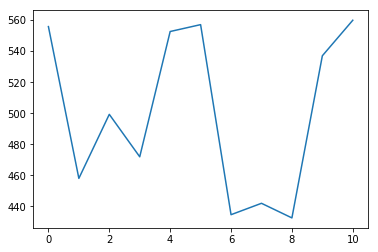